In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [31]:
ds = pd.read_csv('customer_purchases.csv')

In [32]:
ds.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [33]:
ds.tail()

,Age,Salary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [34]:
ds.shape

(400, 3)

In [35]:
ds.columns

Index(['Age', 'Salary', 'Purchased'], dtype='object')

In [37]:
ds['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

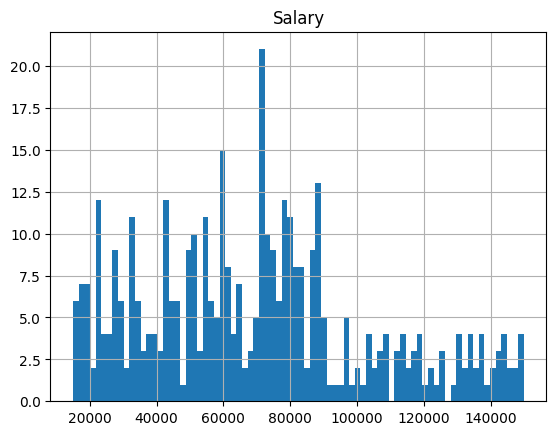

In [52]:
ds.hist(column='Salary', bins=80)

In [41]:

X = ds[['Age','Salary']] .values  #.astype(float)
X[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [42]:
y = ds['Purchased'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [43]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

In [60]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (320, 2) (320,)
Test set: (80, 2) (80,)


In [61]:
from sklearn.neighbors import KNeighborsClassifier

k = 4

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [62]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [63]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.90625
Test set Accuracy:  0.95


In [64]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
   
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.8875, 0.8875, 0.95  , 0.95  , 0.95  , 0.95  , 0.95  , 0.95  ,
       0.95  ])

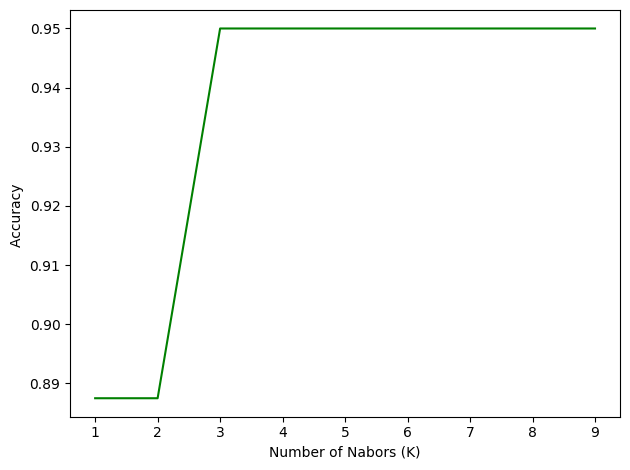

In [65]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [66]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.95 with k= 3
